In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/Exams/weather.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
weather = pd.read_csv(file_content_stream).reset_index(drop = True)
weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [2]:
## Subsetting the data 
weather = weather[weather['hpwren_timestamp'] <= '2011-10-31'].reset_index(drop = True)
weather.shape

(73045, 13)

In [3]:
## Dropping rowID
weather = weather.drop(columns = ['rowID'], axis = 1)
weather.head()

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
## Removing observation with NAs
weather = weather.dropna()
weather.shape

(73029, 12)

In [5]:
## Transforming data to 0-1 scale
scaler = MinMaxScaler()

weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1', 'max_wind_speed_0_1','relative_humidity_0_1']] = scaler.fit_transform(weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']])
weather.head()

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1
1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000
2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429
3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714
4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000
5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


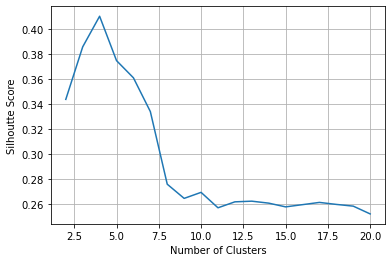

In [6]:
## Defining the variables of interest
X = weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1', 'max_wind_speed_0_1', 'relative_humidity_0_1']]

## Defining list to store results 
scores = list()

for i in range(2, 21):
    print(i)
    ## Running k-means
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    kmeans_labels = kmeans_md.labels_
    
    ## Computing and scoring silhouette score
    scores.append(silhouette_score(X, kmeans_labels))
    
## Visualizing results
plt.plot(range(2, 21), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.show()

In [8]:
## Clustering the data into four clusters 
kmeans_md = KMeans(n_clusters = 4, n_init = 20).fit(X)

## Appending cluster labels 
weather['cluster'] = kmeans_md.labels_
weather.head()

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000,2
2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429,0
3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714,0
4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000,1
5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429,0


In [9]:
## Cluster 0 
cluster_0 = weather[weather['cluster'] == 0]
cluster_0.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.0
mean,916.975096,70.894025,43.060075,2.176210,58.804693,2.638614,94.576464,1.713692,0.000004,0.009672,30.852671,0.627510,0.557168,0.119944,0.093000,0.163801,0.098396,0.296602,0.0
std,1.541492,6.899392,27.940192,1.331279,30.332985,1.555132,121.200182,1.132889,0.000379,0.652852,13.171070,0.154149,0.150314,0.077828,0.056892,0.084493,0.060276,0.150527,0.0
min,911.300000,46.040000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,4.900000,0.060000,0.015686,0.000000,0.004274,0.000000,0.000000,0.000000,0.0
25%,915.700000,65.840000,21.000000,1.200000,37.000000,1.500000,21.000000,0.900000,0.000000,0.000000,22.100000,0.500000,0.447059,0.058496,0.051282,0.103064,0.054264,0.196571,0.0
50%,917.200000,71.240000,40.000000,1.900000,54.000000,2.300000,42.000000,1.500000,0.000000,0.000000,28.400000,0.650000,0.564706,0.111421,0.081197,0.150418,0.085271,0.268571,0.0
75%,918.200000,75.560000,58.000000,2.800000,72.000000,3.400000,84.000000,2.300000,0.000000,0.000000,36.300000,0.750000,0.658824,0.161560,0.119658,0.200557,0.127907,0.358857,0.0
max,920.700000,90.680000,132.000000,8.900000,248.000000,11.000000,359.000000,7.200000,0.060000,50.000000,79.700000,1.000000,0.988235,0.367688,0.380342,0.690808,0.422481,0.854857,0.0


In [10]:
## Cluster 1 
cluster_1 = weather[weather['cluster'] == 1]
cluster_1.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.0
mean,915.715838,54.343655,193.024252,2.556118,203.545857,3.160286,182.365505,1.931682,0.000134,0.401945,82.404124,0.501584,0.196594,0.537672,0.109236,0.566980,0.118616,0.885761,1.0
std,1.770683,5.235827,68.960267,1.904957,70.862749,2.249620,69.451198,1.612613,0.002343,4.238760,10.876360,0.177068,0.114070,0.192090,0.081408,0.197389,0.087195,0.124301,0.0
min,910.700000,45.320000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,47.800000,0.000000,0.000000,0.000000,0.004274,0.000000,0.000000,0.490286,1.0
25%,914.700000,50.540000,172.000000,1.100000,184.000000,1.500000,161.000000,0.700000,0.000000,0.000000,72.300000,0.400000,0.113725,0.479109,0.047009,0.512535,0.054264,0.770286,1.0
50%,915.700000,53.060000,197.000000,2.100000,208.000000,2.600000,187.000000,1.500000,0.000000,0.000000,89.200000,0.500000,0.168627,0.548747,0.089744,0.579387,0.096899,0.963429,1.0
75%,916.900000,57.740000,226.000000,3.600000,240.000000,4.300000,213.000000,2.800000,0.000000,0.000000,91.500000,0.620000,0.270588,0.629526,0.153846,0.668524,0.162791,0.989714,1.0
max,920.000000,68.720000,359.000000,23.400000,359.000000,25.900000,359.000000,21.600000,0.120000,60.000000,92.400000,0.930000,0.509804,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [11]:
## Cluster 2 
cluster_2 = weather[weather['cluster'] == 2]
cluster_2.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.0
mean,916.989557,72.759865,211.934548,2.180736,229.750078,2.701759,194.377190,1.640612,0.000022,0.022678,35.012011,0.628956,0.597818,0.590347,0.093194,0.639972,0.100843,0.344137,2.0
std,1.578319,5.601557,52.626859,1.317159,53.970806,1.479768,56.292571,1.195305,0.001576,1.049821,13.091460,0.157832,0.122038,0.146593,0.056289,0.150337,0.057355,0.149617,0.0
min,911.100000,52.520000,66.000000,0.000000,140.000000,0.100000,1.000000,0.000000,0.000000,0.000000,4.900000,0.040000,0.156863,0.183844,0.000000,0.389972,0.000000,0.000000,2.0
25%,915.900000,68.720000,177.000000,1.100000,189.000000,1.500000,165.000000,0.700000,0.000000,0.000000,25.300000,0.520000,0.509804,0.493036,0.047009,0.526462,0.054264,0.233143,2.0
50%,917.100000,72.320000,200.000000,2.000000,215.000000,2.500000,186.000000,1.400000,0.000000,0.000000,33.200000,0.640000,0.588235,0.557103,0.085470,0.598886,0.093023,0.323429,2.0
75%,918.100000,77.000000,224.000000,3.000000,247.000000,3.700000,210.000000,2.400000,0.000000,0.000000,44.400000,0.740000,0.690196,0.623955,0.128205,0.688022,0.139535,0.451429,2.0
max,920.700000,91.220000,357.000000,8.600000,359.000000,10.100000,359.000000,7.500000,0.200000,60.000000,66.200000,1.000000,1.000000,0.994429,0.367521,1.000000,0.387597,0.700571,2.0


In [12]:
## Cluster 3 
cluster_3 = weather[weather['cluster'] == 3]
cluster_3.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,cluster
count,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.0,3292.0,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.0
mean,916.802582,70.648056,341.160085,1.514793,21.335966,2.135419,307.117861,0.946841,0.0,0.0,33.993044,0.610258,0.551809,0.950307,0.064735,0.059432,0.078892,0.332492,3.0
std,1.430476,7.506860,20.274226,1.016307,22.635771,1.289573,43.043985,0.816548,0.0,0.0,14.016831,0.143048,0.163548,0.056474,0.043432,0.063052,0.049983,0.160192,0.0
min,911.600000,46.220000,209.000000,0.000000,0.000000,0.100000,71.000000,0.000000,0.0,0.0,8.700000,0.090000,0.019608,0.582173,0.000000,0.000000,0.000000,0.043429,3.0
25%,915.800000,66.155000,335.000000,0.700000,5.000000,1.200000,289.000000,0.300000,0.0,0.0,25.075000,0.510000,0.453922,0.933148,0.029915,0.013928,0.042636,0.230571,3.0
50%,916.900000,71.510000,348.000000,1.300000,14.000000,1.900000,322.000000,0.700000,0.0,0.0,29.900000,0.620000,0.570588,0.969359,0.055556,0.038997,0.069767,0.285714,3.0
75%,917.900000,76.460000,355.000000,2.100000,29.000000,2.800000,338.000000,1.500000,0.0,0.0,39.400000,0.720000,0.678431,0.988858,0.089744,0.080780,0.104651,0.394286,3.0
max,920.700000,90.500000,359.000000,7.000000,154.000000,8.700000,357.000000,5.500000,0.0,0.0,91.200000,1.000000,0.984314,1.000000,0.299145,0.428969,0.333333,0.986286,3.0
